## Fundamentos para la Ciencia de Datos

- Clase: 15
- Tema: Regresión
- Docente: [Daniela Blanco](https://www.linkedin.com/in/danielablanco/)

El objetivo del estudio es analizar [datos de reservas de vuelos](https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction) obtenidos del sitio web "Ease My Trip".

Un estudio exhaustivo de los datos ayudará a descubrir ideas valiosas que serán de enorme valor para los pasajeros.

Contiene información sobre las opciones de reserva de vuelos para viajes en avión entre las 6 principales ciudades metropolitanas de la India. Hay 300261 registros y 11 características.

- Airline: compañía aérea. Es una característica categórica con 6 aerolíneas diferentes.
- Flight: código de vuelo del avión. Es una característica categórica.
- Source City: Ciudad desde la cual despega el vuelo. Es una característica categórica con 6 ciudades únicas.
- Departure Time: hora de salida. Tiene 6 etiquetas de tiempo únicas.
- Stops: Una característica categórica con 3 valores distintos que almacena el número de escalas entre las ciudades de origen y destino.
- Arrival Time: hora de llegada. Tiene 6 etiquetas de tiempo únicas.
- Destination City: Ciudad donde aterrizará el vuelo. Es una característica categórica con 6 ciudades únicas.
- Class:  clase de asiento; tiene dos valores distintos: Negocios y Económica.
- Duration: característica continua que muestra la cantidad total de tiempo que lleva viajar entre ciudades en horas.
- Days Left:se calcula restando la fecha del viaje a la fecha de reserva.
- Price: precio del boleto.




## Importación

In [2]:
import numpy as np
import pandas as pd

# visualizacion
import matplotlib.pyplot as plt
import seaborn as sns

# preprocesamiento
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# algoritmos
from sklearn.linear_model import LinearRegression , Ridge , Lasso, RidgeCV
from sklearn.neighbors import KNeighborsRegressor as KNN
from xgboost import XGBRegressor

# Dataset

In [20]:
# Cargar
df = pd.read_csv("/Users/pablo/github/ch-data-scientist-I/regresion_price_tickets (1).csv", delim_whitespace=",")

/var/folders/88/v09k33516hv_q0g09dwd84ym0000gn/T/ipykernel_1395/2992207569.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("/Users/pablo/github/ch-data-scientist-I/regresion_price_tickets (1).csv", delim_whitespace=",")


In [21]:
df.head(10)

,",airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price"
0,"0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mu..."
1,"1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Mo..."
2,"2,AirAsia,I5-764,Delhi,Early_Morning,zero,Earl..."
3,"3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,..."
4,"4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mu..."
5,"5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,..."
6,"6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mu..."
7,"7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,..."
8,"8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Mor..."
9,"9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening..."


# EDA

In [22]:
df.shape

(300153, 1)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 1 columns):
 #   Column                                                                                                         Non-Null Count   Dtype 
---  ------                                                                                                         --------------   ----- 
 0   ,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price  300153 non-null  object
dtypes: object(1)
memory usage: 2.3+ MB


In [24]:
# eliminamos una columna erronea
df.drop("Unnamed: 0",axis=1,inplace =True)

KeyError: "['Unnamed: 0'] not found in axis"

In [12]:
df.shape

(180602, 1)

In [13]:
# control duplicados
df.duplicated().sum()

np.int64(180394)

In [14]:
# control de nulos
df.isna().sum()

date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price    177513
dtype: int64

In [15]:
# informacion
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 180602 entries, ('11-02-2022,Air', 'India,AI,868,18:00,Delhi,02h', '00m,non-stop') to (',19:50,Hyderabad,81,585"', nan, nan)
Data columns (total 1 columns):
 #   Column                                                                         Non-Null Count  Dtype 
---  ------                                                                         --------------  ----- 
 0   date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price  3089 non-null   object
dtypes: object(1)
memory usage: 4.2+ MB


## Datos numéricos

In [16]:
df.describe()

,"date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price"
count,3089
unique,207
top,",11:15,Mumbai,""22,152"""
freq,46


<Axes: >

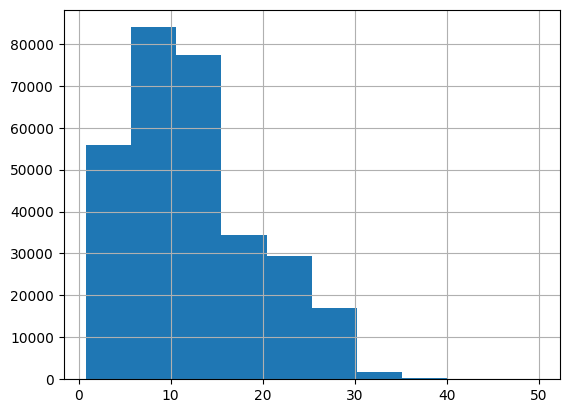

In [ ]:
df['duration'].hist()

<Axes: >

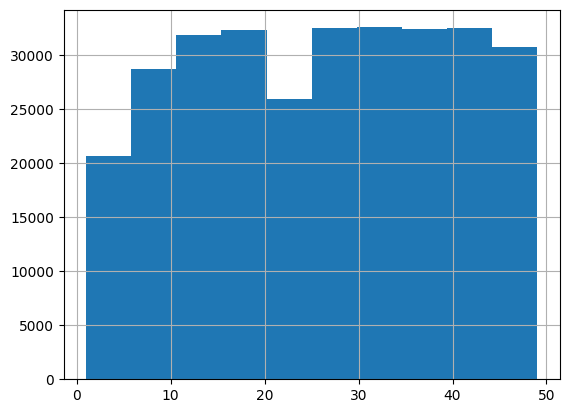

In [ ]:
df['days_left'].hist()

<Axes: ylabel='duration'>

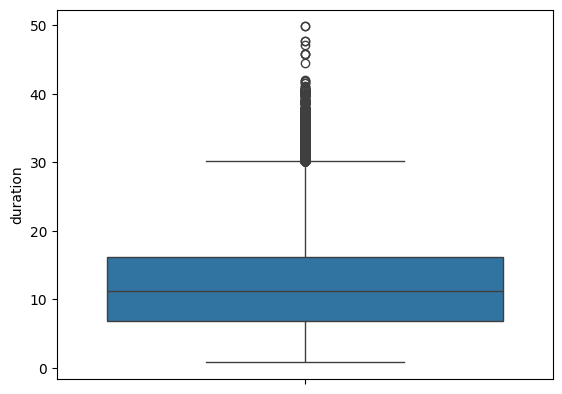

In [ ]:
sns.boxplot(data=df['duration'])

<Axes: ylabel='days_left'>

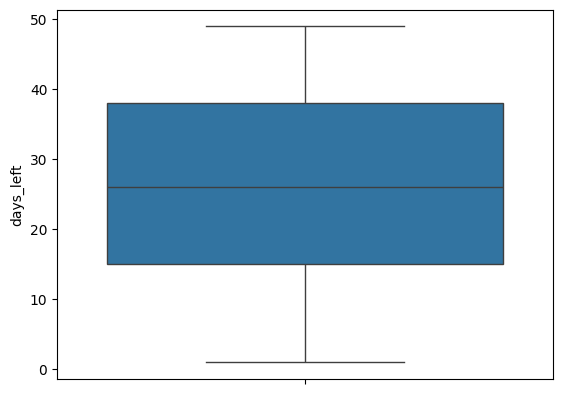

In [ ]:
sns.boxplot(data=df['days_left'])

In [ ]:
# manejo de outliers
def outliers(data,feature):
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    iqr = q3 - q1

    lower_limit = q1 - iqr *1.5
    upper_limit = q3 + iqr *1.5

    ls = data.index[(data[feature]<lower_limit) | (data[feature]>upper_limit)]

    return ls

def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [ ]:
# obtención de outliers
index_list = []
index_list.extend(outliers(df,'duration'))

index_list

[10534,
 10535,
 10540,
 10891,
 10892,
 11072,
 11073,
 11428,
 11429,
 11612,
 11613,
 12061,
 12062,
 12070,
 12256,
 20321,
 20464,
 20467,
 20601,
 21097,
 21126,
 21390,
 21582,
 21771,
 22155,
 22352,
 22733,
 23116,
 23488,
 23681,
 24049,
 24903,
 25271,
 25590,
 26021,
 26212,
 26573,
 26949,
 27324,
 27517,
 28370,
 28598,
 28825,
 29194,
 29209,
 29417,
 29418,
 29534,
 29909,
 30057,
 30070,
 30300,
 30301,
 34587,
 34893,
 35402,
 35403,
 35407,
 35413,
 35499,
 35504,
 35588,
 35590,
 36030,
 36031,
 36754,
 36755,
 36761,
 37089,
 37090,
 37093,
 37755,
 37932,
 37949,
 37950,
 38275,
 38291,
 38436,
 38460,
 38461,
 38620,
 38783,
 38801,
 38802,
 38965,
 38966,
 38969,
 39136,
 39137,
 39144,
 39311,
 39312,
 39323,
 39469,
 39495,
 39641,
 39642,
 39646,
 39828,
 39990,
 39991,
 39998,
 40169,
 40170,
 40177,
 40347,
 40348,
 40351,
 40518,
 40519,
 40529,
 40676,
 40677,
 40853,
 40854,
 40861,
 41034,
 41193,
 41194,
 41200,
 41375,
 41376,
 41385,
 41550,
 41551,


In [ ]:
df.iloc[135586]['duration']

40.5

In [ ]:
df.iloc[143198]['duration']

30.33

In [ ]:
# borramos outliers
df = remove(df,index_list)

In [ ]:
df.shape

(298043, 11)

## Datos categóricos

In [ ]:
df['airline'].value_counts()

,count
airline,
Vistara,127040
Air_India,79601
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


In [ ]:
df['source_city'].value_counts()

,count
source_city,
Delhi,61183
Mumbai,60709
Bangalore,51554
Kolkata,45881
Hyderabad,40638
Chennai,38078


In [ ]:
df['departure_time'].value_counts()

,count
departure_time,
Morning,70416
Early_Morning,66212
Evening,64990
Night,48013
Afternoon,47106
Late_Night,1306


In [ ]:
df['stops'].value_counts()

,count
stops,
one,249573
zero,36004
two_or_more,12466


In [ ]:
df['arrival_time'].value_counts()

,count
arrival_time,
Night,90752
Evening,77261
Morning,62730
Afternoon,37943
Early_Morning,15369
Late_Night,13988


In [ ]:
df['destination_city'].value_counts()

,count
destination_city,
Mumbai,58686
Delhi,57162
Bangalore,50712
Kolkata,49161
Hyderabad,42339
Chennai,39983


In [ ]:
df['class'].value_counts()

,count
class,
Economy,204792
Business,93251


## Preprocesamiento

In [ ]:
# label encoder para la categoricas
column=['airline','source_city','departure_time','stops','arrival_time','destination_city','class']

df[column] = df[column].apply(LabelEncoder().fit_transform)

In [ ]:
# elimino el id de vuelo
df.drop('flight',axis=1,inplace=True)

In [ ]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,2,5,5,1,2.17,1,5953
1,4,2,1,2,4,5,1,2.33,1,5953
2,0,2,1,2,1,5,1,2.17,1,5956
3,5,2,4,2,0,5,1,2.25,1,5955
4,5,2,4,2,4,5,1,2.33,1,5955


## Modelado

In [ ]:
# Cargar los datos
X = df.drop(['price'],axis=1)
y = df['price']

In [ ]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=16)

print('x_train size',X_train.shape)
print('y_train size',y_train.shape)
print('x_test size',X_test.shape)
print('y_test size',y_test.shape)

x_train size (208630, 9)
y_train size (208630,)
x_test size (89413, 9)
y_test size (89413,)


### Regresión lineal

In [ ]:
# instanciamos el modelo
model=LinearRegression()

In [ ]:
# entranamos
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# prediccion
y_pred = model.predict(X_test)

In [ ]:
# metrica R2
r2_rl = r2_score(y_test, y_pred)
r2_rl

0.9047091074870598

In [ ]:
model.coef_

array([ 9.56059811e+02,  1.13757117e+02,  4.40958529e+01, -3.36036015e+03,
        1.99150747e+02,  1.20237911e+02, -4.45328033e+04,  7.73158349e+01,
       -1.29965106e+02])

In [ ]:
model.intercept_

50617.00113373307

## KNN

In [ ]:
# instanciamos el modelo
model = KNN(n_neighbors=5,weights="uniform",metric="manhattan")

In [ ]:
# entranamos
model.fit(X_train, y_train)

KNeighborsRegressor(metric='manhattan')

In [ ]:
# prediccion
y_pred = model.predict(X_test)

In [ ]:
# metrica R2
r2_knn = r2_score(y_test, y_pred)
r2_knn

0.771366535725674

### XGBoost

In [ ]:
# instanciamos el modelo
model = XGBRegressor(n_estimators= 2000 , max_depth= 7 , learning_rate = 0.01)

In [ ]:
# entranamos
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# prediccion
y_pred = model.predict(X_test)

In [ ]:
# metrica R2
r2_xgb = r2_score(y_test, y_pred)
r2_xgb

0.9766363352447248

## Resultados en test

In [ ]:
print("Algoritmo Regresión Lineal " + str(round(r2_rl, 4)))
print("Algoritmo KNN " + str(round(r2_knn, 4)))
print("Algoritmo XGB " + str(round(r2_xgb, 4)))

Algoritmo Regresión Lineal 0.9047
Algoritmo KNN 0.7714
Algoritmo XGB 0.9766


El mejor modelo fue el XGB!

In [ ]:
y_pred[0]

7516.1323

In [ ]:
y_test

,price
153855,9073
29884,9840
251285,29170
277257,56040
27613,4933
...,...
50546,2339
134881,5934
242388,65405
209168,69113
